## Importing necessary packages

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Reading the data
df=pd.read_csv('/content/mental_health_data.csv')

In [3]:
# Checking the count of posts from Various Subreddits
df['subreddit'].value_counts()

mentalhealth          999
Anxiety               998
BPD                   991
SuicideWatch          975
depression            912
CasualConversation    810
bipolar               554
Name: subreddit, dtype: int64

In [4]:
#Checking for NA values
df.isna().sum()

Unnamed: 0        0
title             0
body            316
author           26
url               0
score             0
upvote_ratio      0
subreddit         0
dtype: int64

In [5]:
# Filtering out rows where the body is null
df[df['body'].isna()]

,Unnamed: 0,title,body,author,url,score,upvote_ratio,subreddit
11,11,LPT: Learn to distance yourself from your thou...,NaN,ChillingInChai,/r/LifeProTips/comments/n3loxq/lpt_learn_to_di...,2,1.00,mentalhealth
72,72,Lifelong neglect and abuse has led me unable t...,NaN,Ctantkeeper,/r/selfimprovement/comments/n3h3vv/lifelong_ne...,2,1.00,mentalhealth
213,213,Loving again,NaN,hrundiskel,/r/relationship_advice/comments/n3epx7/do_you_...,1,1.00,mentalhealth
255,255,"My mum is emotionally, verbally and at times p...",NaN,JackDoe1324,/r/domesticviolence/comments/n30v3n/my_mum_is_...,5,0.86,mentalhealth
260,260,I’m so scared,NaN,robsie123,/r/Paranoia/comments/n39e1m/im_so_scared/,1,1.00,mentalhealth
...,...,...,...,...,...,...,...,...
5312,5312,Is hanging the easiest and least painful way t...,NaN,PaceJust,https://www.reddit.com/r/SuicideWatch/comments...,2,1.00,SuicideWatch
5325,5325,I suffer from severe hyperacusis and Tinnitus....,NaN,Acceptable_Slide_667,https://www.reddit.com/r/SuicideWatch/comments...,3,1.00,SuicideWatch
5341,5341,My boyfriend of four years dumped me. My best ...,NaN,Ahunteriwillbe,https://www.reddit.com/r/SuicideWatch/comments...,3,0.80,SuicideWatch
5353,5353,My fiance is about to dump me,NaN,Throwaway2710383952,https://www.reddit.com/r/SuicideWatch/comments...,2,1.00,SuicideWatch


In [6]:
# adding a new column combining title and body of the post
df = df[~((df['body'].isna()) & (df['subreddit'].isin(['bipolar', 'mentalhealth'])))].reset_index().drop('index', axis=1)

df.fillna('', inplace=True)

df['full_text'] = df['title'] + " " + df['body']

In [7]:
# Grouping the posts based on author to check for multiple posts from the same author
author = df.groupby(['subreddit','author']).count()

In [8]:
# Checking authors having posts with high scores(Checking for popularity of posts)
authors_top_score = df[df['subreddit']=="mentalhealth"].groupby(['author']).score.mean().sort_values(ascending = False)[:20].index
authors_top_score

Index(['mothsandhoneydew', 'FelicityOfficial', 'hokeydokeydoo', 'Swappy-',
       'XX_mel_XX', 'AnonymousCounselor52', 'Busy-Chapter-2462',
       'Emotional-Treat-4523', 'imsorry_stillalive', 'Randumby194',
       'Far-Shape-4319', 'ConnecticutJohn', 'unit213x', 'Zeetrocheze',
       'starchild71', 'Critical_Shirt_2398', 'shootme_co', 'nsr-12309',
       'HelpPlease6537', 'rotwice'],
      dtype='object', name='author')

In [9]:
# Calculating mean of scores for subreddits
df[df['subreddit']=="mentalhealth"].groupby(['author']).score.mean().sort_values(ascending = False)[:20]

author
mothsandhoneydew        669.0
FelicityOfficial        618.0
hokeydokeydoo           416.0
Swappy-                 406.0
XX_mel_XX               393.0
AnonymousCounselor52    387.0
Busy-Chapter-2462       296.0
Emotional-Treat-4523    240.0
imsorry_stillalive      189.0
Randumby194             152.0
Far-Shape-4319          130.0
ConnecticutJohn         112.0
unit213x                 69.0
Zeetrocheze              42.0
starchild71              39.0
Critical_Shirt_2398      37.0
shootme_co               36.0
nsr-12309                36.0
HelpPlease6537           28.0
rotwice                  26.0
Name: score, dtype: float64

In [10]:
# Printing one of the post with a high score to check for the content
for i in authors_top_score:
  print(df[df['author']=="mothsandhoneydew"]['body'].iloc[0])
  break

Today I'm glad I'm alive.  

I stared a new antidepressant, and I feel okay. 

 My sweet coworker (who I don't know too well) asked me excitedly when I was working with her next 

My friends were happy and seemed mentally healthy, after many weeks of uphill battles (very proud of them).

I went on a picnic during lunch break with them. It felt good to sit in the grass and see them smile 

I came out gently to one of my friends and it was very casual, loving, and well recieved. 

I spent some good quality time with my mom. 

I am set up to get a cat tomorrow! This is big for me, and was my only motivation to live so it brings me happiness to see it coming together. It makes me feel like I should be alive.


In [11]:
# Performing Reddit specific preprocessing to remove the markdown formatting
import re
def reddit_specific_preprocessing(text):
    
    # Remove newlines (one or more)
    text = re.sub(r'\n+', ' ', text)

    # Remove quotes
    text = re.sub(r'\"?\\?&?gt;?', '', text)

    # Remove asterisk
    text = re.sub(r'\*', '', text)

    # Remove bullet points
    text = re.sub('&amp;#x200B;', '', text)

    # Remove links (always enclosed between parenthesis)
    text = re.sub(r'\[.*?\]\(.*?\)', '', text)

    # Remove strikethroughs
    text = re.sub('~', '', text)

    # Remove spoilers, which is used with < less-than (Preserves the text)
    text = re.sub('&lt;', '', text)
    text = re.sub(r'!(.*?)!', r'\1', text)

    # Code, inline and block
    text = re.sub('`', '', text)

    # Superscript (Preserves the text)
    text = re.sub(r'\^\((.*?)\)', r'\1', text)

    # Table
    text = re.sub(r'\|', ' ', text)
    text = re.sub(':-', '', text)

    # Heading
    text = re.sub('#', '', text)

    # Clean white spaces
    text = text.strip()
    text = re.sub(r'\s\s+', ' ', text)

    return text

In [12]:
# Preparing a subset of the data and storing it in a new dataframe
df_preprocessing = df[["subreddit", 'url', 'full_text']].copy()

In [13]:
# Applying reddit specific preprocessing
df_preprocessing['01_reddit_specific'] = df_preprocessing['full_text'].apply(lambda text: reddit_specific_preprocessing(text))

In [14]:
# Printing out a message
df_preprocessing['01_reddit_specific'][0]

'Craving closeness About a year ago, I got into a relationship that lasted until December 2020. I was the one that broke up. I loved her, but I didn’t see a satisfying future for me, so it was a tough decision to make. The problem is that I now really crave the closeness I had with her, cause I don’t really get that with anyone else. I want the love we had for each other with someone else, and it’s really annoying. I want the spooning, the sex, everything. I’m only 18, so it’s probably not something I should be thinking about, but I do. Is this normal, or should I seek help?'

In [15]:
# Importing nltk package
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
# Implementing a function to perform stopword removal, removing punctuations and performing lemmatization
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import nltk
nltk.download('wordnet')
def clean_message(message):
    '''
    Input:
        message: a string containing a message.
    Output:
        messages_cleaned: a list of words containing the processed message. 

    '''
    stem = PorterStemmer()
    lemma = WordNetLemmatizer()
    stop_words = set(stopwords.words("english"))
    messages_cleaned = []
    message = word_tokenize(message)
    for i in message:
        
        if i.lower() not in stop_words and i.isalnum():
                messages_cleaned.append(re.sub(r'http\S+', '', lemma.lemmatize(i.lower())))
    
    return " ".join(messages_cleaned)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
# applying the clean_message function to the text
df_preprocessing['cleaned_text'] = df_preprocessing["01_reddit_specific"].apply(clean_message)


In [19]:
# Installing langdetect package
!pip install langdetect

In [20]:
# Calculating the count of posts from various languages
import langdetect

l=[]
for i in range(len(df_preprocessing)):
    try:
        l.append(langdetect.detect(df_preprocessing["cleaned_text"].iloc[i]))
    except:
        pass

In [21]:
count = 0
index = []
for i in range(len(l)):
    if l[i] == 'en':
        index.append(i)
        count+=1
    else:
        pass

In [22]:
df_preprocessing

,subreddit,url,full_text,01_reddit_specific,cleaned_text
0,mentalhealth,https://www.reddit.com/r/mentalhealth/comments...,"Craving closeness About a year ago, I got into...","Craving closeness About a year ago, I got into...",craving closeness year ago got relationship la...
1,mentalhealth,https://www.reddit.com/r/mentalhealth/comments...,Mental health class I think schools should hav...,Mental health class I think schools should hav...,mental health class think school mandatory men...
2,mentalhealth,https://www.reddit.com/r/mentalhealth/comments...,My 7yo son accidentally fell on our pet bird a...,My 7yo son accidentally fell on our pet bird a...,7yo son accidentally fell pet bird killed 11 y...
3,mentalhealth,https://www.reddit.com/r/mentalhealth/comments...,Who else doesn’t want covid world to leave My ...,Who else doesn’t want covid world to leave My ...,else want covid world leave mental health bad ...
4,mentalhealth,https://www.reddit.com/r/mentalhealth/comments...,my mental health is suffering due to my contro...,my mental health is suffering due to my contro...,mental health suffering due controlling toxic ...
...,...,...,...,...,...
5990,CasualConversation,https://www.reddit.com/r/CasualConversation/co...,Gave my 4 year old stepson an empty box to pla...,Gave my 4 year old stepson an empty box to pla...,gave 4 year old stepson empty box play got pac...
5991,CasualConversation,https://www.reddit.com/r/CasualConversation/co...,I just realized that I'm not funny anymore For...,I just realized that I'm not funny anymore For...,realized funny anymore whole life people would...
5992,CasualConversation,https://www.reddit.com/r/CasualConversation/co...,Am I the only one that finds the words “best f...,Am I the only one that finds the words “best f...,one find word best friend immature weird used ...
5993,CasualConversation,https://www.reddit.com/r/CasualConversation/co...,Anyone else has a big fear to physical pain I ...,Anyone else has a big fear to physical pain I ...,anyone else big fear physical pain mean sure f...


In [23]:
# Keeping only posts in English
df_english = df_preprocessing.iloc[index]
df = df_english[["subreddit","cleaned_text"]]

In [24]:
df = df_english[["subreddit","cleaned_text"]]

In [25]:
df.to_csv('data_preprocessed.csv')

## Vectorizing the posts

In [26]:
# Vectorizing the posts using Count Vectorizer and TFidf Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer()
X_cv = cv.fit_transform(df['cleaned_text'])
X_tfidf = tfidf.fit_transform(df['cleaned_text'])

In [27]:
df['subreddit'].value_counts()

Anxiety               988
BPD                   987
mentalhealth          982
SuicideWatch          929
depression            901
CasualConversation    805
bipolar               315
Name: subreddit, dtype: int64

In [28]:
# Storing a list of tokens
df["list"] = df["cleaned_text"].str.split(" ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
# Giving labels to the subreddit column
df['subreddit_labels'] = df['subreddit'].map({'BPD':0,'mentalhealth':1,"Anxiety":2,"SuicideWatch":3,"depression":4,"CasualConversation":5,"bipolar":6})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer()
X_cv = cv.fit_transform(df['cleaned_text'])
X_tfidf = tfidf.fit_transform(df['cleaned_text'])

In [31]:
y = df["subreddit_labels"]

In [32]:
#X_cv.toarray()
X_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
len(cv.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


18357

In [34]:
X_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
print(np.any(np.isnan(X_cv.toarray())))
print(np.all(np.isfinite(X_cv.toarray())))

False
True


## Gaussian Naive Bayes

In [36]:
# Implementing Gaussian Naive Bayes model to predict target labels
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
model_nb = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(X_cv.toarray(),y)
model_nb.fit(X_train, y_train)

y_pred_n = model_nb.predict(X_test)

print(accuracy_score(y_pred_n, y_test))

0.3053486797562627


## Multinomial Naive Bayes

In [37]:
# Implementing Multionomial Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
model = MultinomialNB()
X = np.nan_to_num(X_tfidf)
X_train, X_test, y_train, y_test = train_test_split(X.toarray(),y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_pred, y_test))

0.44008124576844954


## Logistic Regression

In [38]:
# Implementing logistic regression
from sklearn.linear_model import LogisticRegression

linear_model = LogisticRegression()

linear_model.fit(X_train,y_train)
y_pred = linear_model.predict(X_test)

print(accuracy_score(y_pred, y_test))

0.5822613405551794


In [41]:
# Installing gensim package
!pip install gensim

## Word2Vec

In [42]:
# Implementing Word2vec as the previous methods were not helpful in capturing the context of the posts. 
# The accuracy of the model was also pretty low.
import gensim
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'].str.split(" "),y)
from gensim.models import Word2Vec

word2vec = Word2Vec(df['cleaned_text'].str.split(" "))
vectors = word2vec.wv.get_normed_vectors()
words = set(word2vec.wv.index_to_key)
X_train_vect = np.array([np.array([word2vec.wv[i] for i in ls if i in words])
                         for ls in X_train])
X_test_vect = np.array([np.array([word2vec.wv[i] for i in ls if i in words])
                     for ls in X_test])
X_train_vect_avg = []
for v in X_train_vect:
    #print(len(v))
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
        
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # This is added back by InteractiveShellApp.init_path()


In [43]:
words = set(word2vec.wv.index_to_key)
X_train_vect = np.array([np.array([word2vec.wv[i] for i in ls if i in words])
                         for ls in X_train])
X_test_vect = np.array([np.array([word2vec.wv[i] for i in ls if i in words])
                     for ls in X_test])
X_train_vect_avg = []
for v in X_train_vect:
    #print(len(v))
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
        
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


In [44]:
X_train_vect_avg = []
for v in X_train_vect:
    #print(len(v))
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
        
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

## Random Forest

In [45]:
# Implementing Random Forest Classifier on the Word2Vec embedding
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_vect_avg, y_train)
y_pred = rf.predict(X_test_vect_avg)
print(accuracy_score(y_pred, y_test))

0.3974272173324306


In [46]:
# Implementing Logistic Regression on the Word2Vec embedding
linear_model = LogisticRegression()
linear_model.fit(X_train_vect_avg, y_train)
y_pred = linear_model.predict(X_test_vect_avg)
print(accuracy_score(y_pred, y_test))

0.45903859174001355


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## TSNE

In [47]:
# Implementing TSNE to visualize the Word2Vec embeddings
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
#         plt.annotate(labels[i],
#                      xy=(x[i], y[i]),
#                      xytext=(5, 2),
#                      textcoords='offset points',
#                      ha='right',
#                      va='bottom')
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


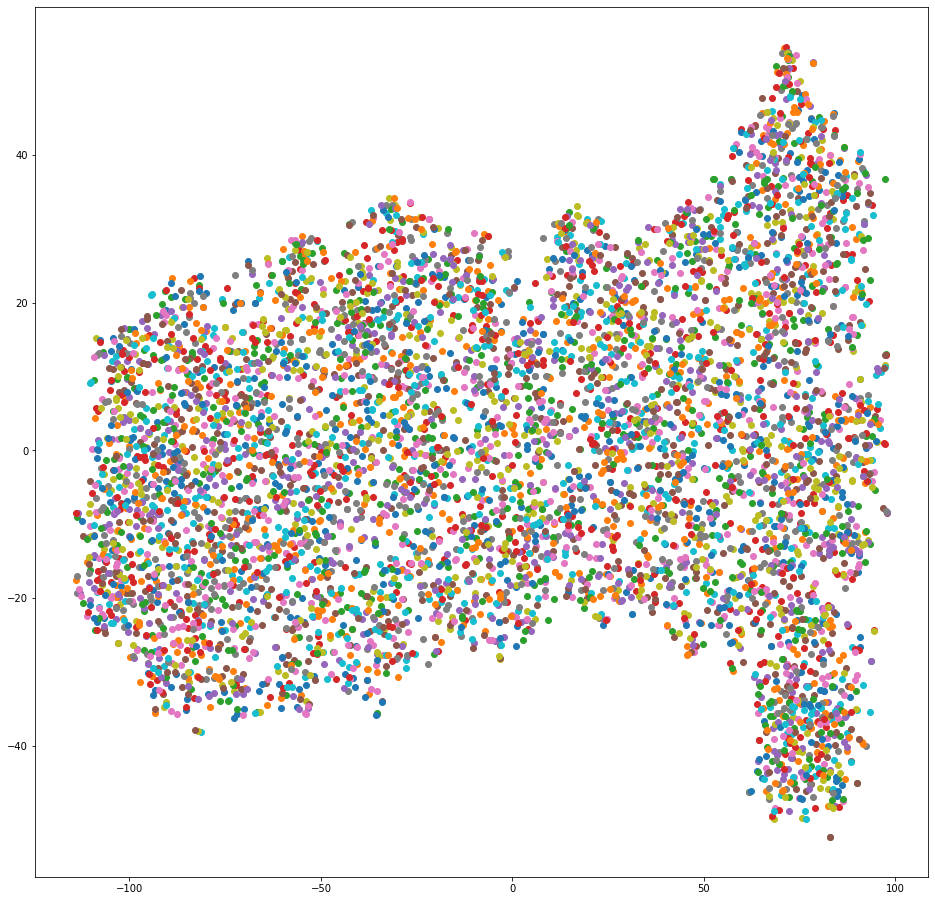

In [48]:
tsne_plot(word2vec)

In [49]:
# Import Sentiment Analyzer package
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [50]:
# Implementing a function to calculate polarity scores given a post.
def get_polarity(text):
    return sid.polarity_scores(text)['compound']

In [51]:
df['polarity_score'] = df['cleaned_text'].apply(get_polarity)

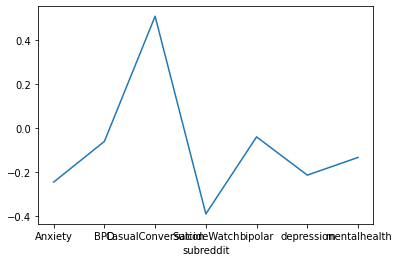

In [52]:
# Plotting the mean polarity scores among various subreddits
df.groupby('subreddit').polarity_score.mean().plot()

In [53]:
# Calculating the mean polarity scores among various subreddits
df.groupby('subreddit').polarity_score.mean()
# Causal Conversation
# Suicide Watch
# Anxiety

subreddit
Anxiety              -0.244861
BPD                  -0.059758
CasualConversation    0.509793
SuicideWatch         -0.389597
bipolar              -0.039074
depression           -0.213110
mentalhealth         -0.132670
Name: polarity_score, dtype: float64

In [54]:
# Returning the number of unique elements in each subreddit
for i in df['subreddit'].unique():    
    print("{}: {}".format(i,len(df[df['subreddit']==""+str(i)+""])))

mentalhealth: 982
depression: 901
Anxiety: 988
bipolar: 315
BPD: 987
SuicideWatch: 929
CasualConversation: 805


In [55]:
#removing bipolar subreddit

df = df[df['subreddit']!="bipolar"]

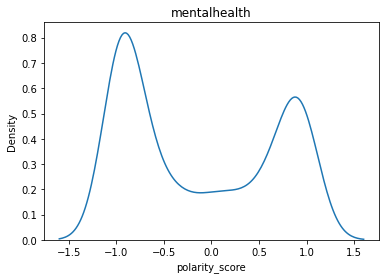

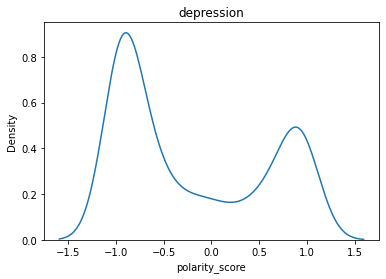

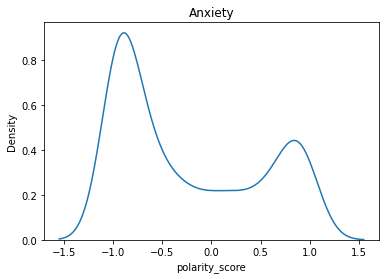

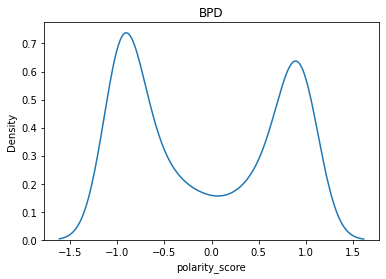

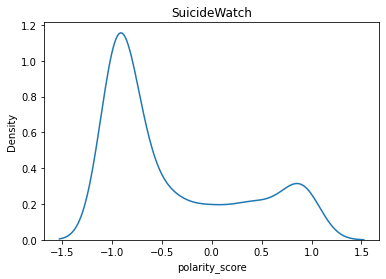

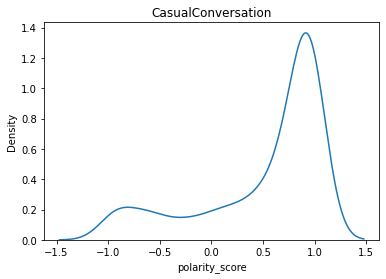

In [56]:
# Plotting the polarity scores for various subreddits
import matplotlib.pyplot as plt
import seaborn as sns
j = 1
for i in df['subreddit'].unique():#['CasualConversation','SuicideWatch','Anxiety']:
    plt.figure(j)
    sns.kdeplot(df[df['subreddit'] == ""+str(i)+""]['polarity_score'])#.plot.hist()
    plt.title(str(i))
    j+=1

In [57]:
get_polarity("hello I'm feeling sad") # from the plots - anxiety and bipolar

-0.3818

In [58]:
get_polarity("I'm dying") # bipolar - from the plots

0.0

In [59]:
# Function to return a label predicting which subreddit the given sentence might belong to.
def get_severity(text):
    from scipy.stats import gaussian_kde
    severity = ""
    max_severity = float("-inf")
    for i in df.subreddit.unique():
        kde = gaussian_kde(df[df['subreddit']==""+str(i)+""]['polarity_score'].values)
        sev = kde.evaluate([get_polarity(text)])
        
        if sev > max_severity:
            
            severity = i
            max_severity = sev
            
    return severity

In [60]:
# Testing with a sample sentence
get_severity("I'm Happy now")

'CasualConversation'

In [61]:
filtered= df[df['subreddit'].isin(['CasualConversation','depression','SuicideWatch'])]


In [62]:
# only casual conversation subreddit has a positive mean polarity score.
filtered.groupby('subreddit').polarity_score.mean()

subreddit
CasualConversation    0.509793
SuicideWatch         -0.389597
depression           -0.213110
Name: polarity_score, dtype: float64

In [63]:
# Implementing Logistic regression on cleaned text improved the results significantly
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(filtered['cleaned_text'])
y = filtered["subreddit_labels"]
X_train, X_test, y_train, y_test = train_test_split(X, filtered["subreddit_labels"])
for i in [0.01,0.1,0.5,1,2,3,4,5]:
    model = LogisticRegression(C = i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"C-value {i} and accuracy : {accuracy_score(y_pred, y_test)}")

C-value 0.01 and accuracy : 0.44157814871016693
C-value 0.1 and accuracy : 0.716236722306525
C-value 0.5 and accuracy : 0.7177541729893778
C-value 1 and accuracy : 0.716236722306525
C-value 2 and accuracy : 0.7147192716236722
C-value 3 and accuracy : 0.7040971168437026
C-value 4 and accuracy : 0.7040971168437026
C-value 5 and accuracy : 0.701062215477997


## Support Vector Classifier

In [64]:
# Implementing Support Vector Classifier
from sklearn.svm import SVC
for i in [0.01,0.1,0.5,1,2,3,4,5]:
    model = SVC(C=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"C - Value: {i} and accuracy : {accuracy_score(y_pred, y_test)}")

C - Value: 0.01 and accuracy : 0.3520485584218513
C - Value: 0.1 and accuracy : 0.3520485584218513
C - Value: 0.5 and accuracy : 0.7071320182094082
C - Value: 1 and accuracy : 0.7298937784522003
C - Value: 2 and accuracy : 0.7192716236722306
C - Value: 3 and accuracy : 0.7192716236722306
C - Value: 4 and accuracy : 0.716236722306525
C - Value: 5 and accuracy : 0.7147192716236722


In [65]:
# Implementing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
for i in [100,200,300,400,500,1000]:
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"N-Estimators: {i} and accuracy : {accuracy_score(y_pred, y_test)}")

N-Estimators: 100 and accuracy : 0.7025796661608498
N-Estimators: 200 and accuracy : 0.7132018209408194
N-Estimators: 300 and accuracy : 0.7177541729893778
N-Estimators: 400 and accuracy : 0.7071320182094082
N-Estimators: 500 and accuracy : 0.723823975720789
N-Estimators: 1000 and accuracy : 0.7298937784522003


In [66]:
# Printing out the Classficiation report for the Random Forest Model
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           3       0.78      0.68      0.73       268
           4       0.59      0.67      0.63       197
           5       0.82      0.86      0.84       194

    accuracy                           0.73       659
   macro avg       0.73      0.74      0.73       659
weighted avg       0.74      0.73      0.73       659



In [67]:
# Performing Train-test split
y = filtered["subreddit_labels"]
X_train, X_test, y_train, y_test = train_test_split(filtered['cleaned_text'].str.split(" "),y)

In [68]:
# Loading the pre-processed data which was stored in a csv file
df = pd.read_csv("/content/data_preprocessed.csv")

In [ ]:
topics = []
for i in range(len(df)):
    topics.append(df["url"].iloc[i].split('/')[4])

In [ ]:
df["Topics"] = topics

In [ ]:
df[["lemmatization_nuon_adj", "Topics"]]

,lemmatization_nuon_adj,Topics
0,craving closeness year relationship future tou...,mentalhealth
1,mental health class school mandatory mental he...,mentalhealth
2,7yo son pet bird yr son help advice trauma fir...,mentalhealth
3,covid world mental health bad battle life anxi...,mentalhealth
4,mental health due toxic household note previou...,mentalhealth
...,...,...
5990,year old stepson empty box play package big pe...,CasualConversation
5991,funny whole life people funny joke funny story...,CasualConversation
5992,one word good friend immature weird call frien...,CasualConversation
5993,big fear physical pain physical pain want last...,CasualConversation


In [ ]:
df = df.drop(columns = ["Unnamed: 0"])

In [ ]:
df_req = df["lemmatization_nuon_adj"]

In [ ]:
df_req.isnull().sum()

28

In [ ]:
df_req = df_req.dropna()

In [ ]:
# Forming bigrams from the sentence for further analysis
import gensim
def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod
# Converting the given sentence to words
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def get_corpus(df):
    words = list(sent_to_words(df))
    bigram_mod = bigrams(words)
    bigram = [bigram_mod[review] for review in words]
    id2word = gensim.corpora.Dictionary(bigram)
    id2word.filter_extremes(no_below=10, no_above=0.35)
    id2word.compactify()
    corpus = [id2word.doc2bow(text) for text in bigram]
    return corpus, id2word, bigram

In [ ]:
df_req = df["lemmatization_nuon_adj"]

In [ ]:
corpus_req, id2word_req, bigram_req = get_corpus(df_req)

## Latent Dirichlet Allocation

In [ ]:
# Implementing Linear Dirichlet Allocation to find keywords within each topic
chunk_size = len(corpus_req) * (10/200)
lda_model = gensim.models.ldamulticore.LdaMulticore(num_topics=2, 
                                       corpus=corpus_req, 
                                       id2word=id2word_req, 
                                       passes=10, 
                                       workers= 10,
                                       chunksize = chunk_size,
                                       alpha = 0.5, 
                                       random_state = 42,eval_every = 1,per_word_topics=True)

In [ ]:
lda_model.print_topics(20, num_words=20)

[(0,
  '0.024*"life" + 0.023*"people" + 0.020*"thing" + 0.019*"time" + 0.019*"friend" + 0.012*"good" + 0.011*"bad" + 0.011*"way" + 0.011*"day" + 0.010*"year" + 0.009*"person" + 0.008*"relationship" + 0.007*"much" + 0.007*"family" + 0.006*"happy" + 0.006*"well" + 0.006*"point" + 0.005*"lot" + 0.005*"mom" + 0.005*"feeling"'),
 (1,
  '0.020*"day" + 0.017*"time" + 0.016*"anxiety" + 0.012*"thing" + 0.011*"bad" + 0.011*"year" + 0.009*"work" + 0.009*"good" + 0.008*"job" + 0.008*"people" + 0.008*"lot" + 0.008*"week" + 0.007*"month" + 0.006*"today" + 0.006*"help" + 0.006*"hour" + 0.006*"new" + 0.005*"life" + 0.005*"school" + 0.005*"anxious"')]

In [ ]:
for idx, topic in lda_model.print_topics(-1, num_words = 20):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.024*"life" + 0.023*"people" + 0.020*"thing" + 0.019*"time" + 0.019*"friend" + 0.012*"good" + 0.011*"bad" + 0.011*"way" + 0.011*"day" + 0.010*"year" + 0.009*"person" + 0.008*"relationship" + 0.007*"much" + 0.007*"family" + 0.006*"happy" + 0.006*"well" + 0.006*"point" + 0.005*"lot" + 0.005*"mom" + 0.005*"feeling"
Topic: 1 
Words: 0.020*"day" + 0.017*"time" + 0.016*"anxiety" + 0.012*"thing" + 0.011*"bad" + 0.011*"year" + 0.009*"work" + 0.009*"good" + 0.008*"job" + 0.008*"people" + 0.008*"lot" + 0.008*"week" + 0.007*"month" + 0.006*"today" + 0.006*"help" + 0.006*"hour" + 0.006*"new" + 0.005*"life" + 0.005*"school" + 0.005*"anxious"


[(0,
  '0.024*"life" + 0.023*"people" + 0.020*"thing" + 0.019*"time" + 0.019*"friend" + 0.012*"good" + 0.011*"bad" + 0.011*"day" + 0.011*"way" + 0.010*"year" + 0.009*"person" + 0.008*"relationship" + 0.007*"much" + 0.007*"family" + 0.006*"happy"'),
 (1,
  '0.019*"day" + 0.017*"time" + 0.016*"anxiety" + 0.012*"thing" + 0.011*"year" + 0.011*"bad" + 0.009*"work" + 0.009*"good" + 0.008*"people" + 0.008*"job" + 0.008*"lot" + 0.008*"week" + 0.007*"month" + 0.006*"help" + 0.006*"today"')]

In [ ]:
import regex as re
model_out = lda_model[corpus_req]
# get the topic descriptions
topic_sep = re.compile("0\.[0-9]{3}\*") # getting rid of useless formatting
# extract a list of tuples with topic number and descriptors from the model
model_topics = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + ')) 
                for topic_no, model_topic in
                lda_model.print_topics(num_topics=2, num_words=20)]

descriptors = []
cor_dic = {}
for i, m in model_topics:
    print(i+1, ", ".join(m[:20]))
    descriptors.append(", ".join(m[:20]).replace('"', ''))
    cor_dic[i+1] = m

1 "life", "people", "thing", "time", "friend", "good", "bad", "way", "day", "year", "person", "relationship", "much", "family", "happy", "well", "point", "lot", "mom", "feeling"
2 "day", "time", "anxiety", "thing", "bad", "year", "work", "good", "job", "people", "lot", "week", "month", "today", "help", "hour", "new", "life", "school", "anxious"


In [ ]:
print(model_topics)

[(0, ['"life"', '"people"', '"thing"', '"time"', '"friend"', '"good"', '"bad"', '"way"', '"day"', '"year"', '"person"', '"relationship"', '"much"', '"family"', '"happy"', '"well"', '"point"', '"lot"', '"mom"', '"feeling"']), (1, ['"day"', '"time"', '"anxiety"', '"thing"', '"bad"', '"year"', '"work"', '"good"', '"job"', '"people"', '"lot"', '"week"', '"month"', '"today"', '"help"', '"hour"', '"new"', '"life"', '"school"', '"anxious"'])]


In [ ]:
print(model_topics[0][1][:20])

['"life"', '"people"', '"thing"', '"time"', '"friend"', '"good"', '"bad"', '"way"', '"day"', '"year"', '"person"', '"relationship"', '"much"', '"family"', '"happy"', '"well"', '"point"', '"lot"', '"mom"', '"feeling"']


In [ ]:
print(model_topics[0][1][:20][1:-1])

['"people"', '"thing"', '"time"', '"friend"', '"good"', '"bad"', '"way"', '"day"', '"year"', '"person"', '"relationship"', '"much"', '"family"', '"happy"', '"well"', '"point"', '"lot"', '"mom"']


In [ ]:
import random
from gensim.models.phrases import Phrases, Phraser
import gensim.corpora
from gensim.corpora import Dictionary
from gensim.models.phrases import Phrases, Phraser
from gensim import corpora, models
def generate_topics(num_topics, df = df["lemmatization_nuon_adj"].copy()):

    import gensim
    def bigrams(words, bi_min=15, tri_min=10):
        bigram = gensim.models.Phrases(words, min_count = bi_min)
        bigram_mod = gensim.models.phrases.Phraser(bigram)
        return bigram_mod

    def sent_to_words(sentences):
        for sentence in sentences:
            yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

    def get_corpus(df):
        words = list(sent_to_words(df))
        bigram_mod = bigrams(words)
        bigram = [bigram_mod[review] for review in words]
        id2word = gensim.corpora.Dictionary(bigram)
        id2word.filter_extremes(no_below=10, no_above=0.35)
        id2word.compactify()
        corpus = [id2word.doc2bow(text) for text in bigram]
        return corpus, id2word, bigram
    
    corpus_req, id2word_req, bigram_req = get_corpus(df_req)
    
    
    lda_train = gensim.models.ldamulticore.LdaMulticore(
                           corpus=corpus_req,
                           num_topics=2,
                           id2word=id2word_req,
                           chunksize=100,
                           workers=9, 
                           passes=50,
                           eval_every = 1,
                           per_word_topics=True)


    # transform the data into topic distros
    topic_corpus = lda_train[corpus_req]

    # get the topic descriptions
    topic_sep = re.compile("0\.[0-9]{3}\*") # getting rid of useless formatting
    # extract a list of tuples with topic number and descriptors from the model
    model_topics = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + ')) 
                    for topic_no, model_topic in
                    lda_train.print_topics(num_topics=num_topics, num_words=20)]

    descriptors = []
    for i, m in model_topics:
        print(i+1, ", ".join(m[:10]))
        descriptors.append(", ".join(m[:10]).replace('"', ''))
    
    return model_topics

In [ ]:
# Performing cleaning on the topics
def clean_topics(topics):
    
    topic_1 = []

    for t in topics[0][1][:20]:
        topic_1.append(t[1:-1])
        
    topic_2 = []

    for t in topics[1][1][:20]:
        topic_2.append(t[1:-1])
        
    topic_mixed = list(set(topic_1) & set(topic_2))
    
    return topic_1, topic_2, topic_mixed

In [ ]:
len(model_topics)

2

In [ ]:
data = df['lemmatization_nuon_adj'].copy()
data = data.dropna()
data = data.sample(frac=1)

n_splits = 5
N = len(data)
size = int(N*(1/n_splits)) 

data_split_list = []

for i in range(n_splits):
    
    start_index = i*size
    end_index = (i+1)*size
    
    data_i = data[start_index:end_index]
    
    data_split_list.append(data_i)

In [ ]:
t1, t2, tm = clean_topics(model_topics)

In [ ]:
# checking for good topics 
def check_good_topics(topic_1, topic_2, topic_mixed, topic_pilar = 'depression'):
    
    dict_topic = dict()

    if topic_pilar in topic_mixed:
        return dict_topic

    if topic_pilar not in topic_1+topic_2:
        return dict_topic

    if topic_pilar in topic_1:
        dict_topic['topic_1'] = 'A'
        dict_topic['topic_2'] = 'B'

    else:
        dict_topic['topic_1'] = 'B'
        dict_topic['topic_2'] = 'A'
        
    return dict_topic

In [ ]:
check_good_topics(t1, t2, tm, topic_pilar = "anxiety")

{'topic_1': 'B', 'topic_2': 'A'}

In [ ]:
def build_n_topic_models(n_splits=n_splits, num_topics=2):
    for i in range(n_splits):

        good_current_topic = False

        while not good_current_topic:

            print(f"Start iteration for topic number {i+1}")

#             topics = generate_topics(num_topics)
            
            # TODO: generate topics on the subset of the df to get context?
            topics = generate_topics(num_topics, data_split_list[i])

            topic_1, topic_2, topic_mixed = clean_topics(topics)
            dict_topic = check_good_topics(topic_1, topic_2, topic_mixed, topic_pilar = 'anxiety')

            if not dict_topic:
                print(f"\tCURRENT ITERATION FAILED: start again")

            else:
                good_current_topic = True
                print(f"\tDone")
                yield (topic_1, topic_2, topic_mixed, dict_topic)

In [ ]:
topic_models = [(t1, t2, tm, dict_topic) 
                for (t1, t2, tm, dict_topic) in build_n_topic_models(5)]

Start iteration for topic number 1
1 "people", "life", "friend", "thing", "time", "good", "year", "way", "person", "day"
2 "day", "anxiety", "time", "bad", "thing", "week", "year", "month", "mom", "night"
	Done
Start iteration for topic number 2
1 "life", "people", "time", "friend", "thing", "year", "good", "day", "job", "family"
2 "anxiety", "thing", "time", "day", "bad", "people", "good", "lot", "week", "relationship"
	Done
Start iteration for topic number 3
1 "people", "life", "friend", "time", "thing", "good", "year", "day", "way", "person"
2 "anxiety", "day", "time", "bad", "thing", "week", "help", "month", "thought", "depression"
	Done
Start iteration for topic number 4
1 "time", "friend", "day", "good", "year", "people", "thing", "job", "life", "work"
2 "life", "thing", "people", "bad", "time", "anxiety", "day", "way", "good", "relationship"
	Done
Start iteration for topic number 5
1 "day", "anxiety", "time", "year", "job", "work", "week", "bad", "thing", "month"
2 "people", "li

In [ ]:
def get_data(df, topic_model):
    
    topic_1, topic_2, topic_mixed, dict_topic = topic_model

    for post in df:
        
        words = []
        tags = []

        for word in post.split():

            if word in topic_mixed:

                # if in both topics, return a random tag
                tag = random.choice(list(dict_topic.values()))

            elif word in topic_1:
                tag = dict_topic['topic_1']

            elif word in topic_2:
                tag = dict_topic['topic_2']

            else:
                tag = '0'

            words.append(word)
            tags.append(tag)

        yield (words, tags)

In [ ]:
instances_list = []

for i in range(n_splits):
    
    df_split = data_split_list[i]
    topic_model = topic_models[i]
    
    instances = [(words, tags) for (words, tags) in get_data(df_split, topic_model)]
    instances_list.append(instances)

In [ ]:
train = instances_list[0]+instances_list[2]+instances_list[4]
test = instances_list[1]+instances_list[3]

In [ ]:
# collect known word tokens and tags

wordset, tagset = set(), set()
train_instances = train
for (words, tags) in train_instances:
    tagset.update(set(tags))
    wordset.update(set(words))

# map words and tags into ints
PAD = '-PAD-'
UNK = '-UNK-'
word2int = {word: i + 2 for i, word in enumerate(sorted(wordset))}
word2int[PAD] = 0  # special token for padding
word2int[UNK] = 1  # special token for unknown words
 
tag2int = {tag: i + 1 for i, tag in enumerate(sorted(tagset))}
tag2int[PAD] = 0
# to translate it back
int2tag = {i:tag for tag, i in tag2int.items()}


def convert2ints(instances):
    result = []
    for (words, tags) in instances:
        # replace words with int, 1 for unknown words
        word_ints = [word2int.get(word, 1) for word in words]
        # replace tags with int
        tag_ints = [tag2int[tag] for tag in tags]
        result.append((word_ints, tag_ints))
    return result    

In [ ]:
# get some test data
test_instances = test

# apply integer mapping
train_instances_int = convert2ints(train)
test_instances_int = convert2ints(test)

# separate the words from the tags
train_sentences, train_tags = zip(*train_instances_int) 
test_sentences, test_tags = zip(*test_instances_int) 

print(train_instances[1][0])
print(train_sentences[0])
print(train_instances[0][1])
print(train_tags[0])

['mom', 'depression', 'year', 'negative', 'thing', 'part', 'depression', 'part', 'opportunity', 'mixed', 'bravery']
[8189, 10044, 9681, 6516, 4375, 6477, 4735, 854, 5889, 6421, 9102]
['0', '0', '0', '0', '0', '0', '0', 'B', 'B', '0', 'B']
[1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3]


In [ ]:
# get longest training sentence and add 5
MAX_LENGTH = len(max(train_sentences, key=len)) + 5
print(MAX_LENGTH)

573


In [ ]:
from keras.preprocessing.sequence import pad_sequences
 
# add special padding at the end of every instance, up to MAX_LENGTH
train_sentences = pad_sequences(train_sentences, maxlen=MAX_LENGTH, padding='post')
test_sentences = pad_sequences(test_sentences, maxlen=MAX_LENGTH, padding='post')
train_tags = pad_sequences(train_tags, maxlen=MAX_LENGTH, padding='post')
test_tags = pad_sequences(test_tags, maxlen=MAX_LENGTH, padding='post')
 
print(train_sentences[0])
print(train_tags[0])

[ 8189 10044  9681  6516  4375  6477  4735   854  5889  6421  9102     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

## Long Short-Term Memory

In [ ]:
# Importing necessary packages
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Activation
from keras.models import Model
from keras.layers import Input, Embedding
from keras.layers import Bidirectional, LSTM
from keras.layers import Dropout, Dense, Activation

In [ ]:
# Implementing LSTM model to classify the severity of the posts.
model = Sequential()

model.add(Input((MAX_LENGTH, ), name='word_IDs'))
model.add(Embedding(input_dim=len(word2int), output_dim=128, mask_zero=True))

model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.3))
model.add(LSTM(256,return_sequences=True))
model.add(Dropout(0.3))
model.add(Dense(len(tag2int), activation = "sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 573, 128)          1298048   
                                                                 
 batch_normalization (BatchN  (None, 573, 128)         512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 573, 128)          0         
                                                                 
 dropout (Dropout)           (None, 573, 128)          0         
                                                                 
 lstm (LSTM)                 (None, 573, 256)          394240    
                                                                 
 dropout_1 (Dropout)         (None, 573, 256)          0         
                                                        

In [ ]:
test_tags

array([[2, 1, 2, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)

In [ ]:

train_tags_1hot = to_categorical(train_tags, len(tag2int))
test_tags_1hot = to_categorical(test_tags, len(tag2int))

# originally 50 tag IDs
print(train_tags[0])
# now 50 rows with 13 columns
print(train_tags_1hot[0].shape)
# the 1-hot encoding of tag ID 7
print(train_tags_1hot[0])


[1 1 3 1 1 1 1 1 1 1 1 1 2 1 3 1 1 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
train_sentences.shape

(3579, 573)

In [ ]:
train_tags_1hot.shape

(3579, 573, 4)

In [ ]:
batch_size = 16
epochs = 10

# # compile the model we have defined above
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# run training and capture ouput log
history = model.fit(train_sentences, train_tags_1hot,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.3)

Epoch 1/10
157/157 [==============================] - 18s 33ms/step - loss: 0.0154 - accuracy: 0.9045 - val_loss: 0.0562 - val_accuracy: 0.8965
Epoch 2/10
157/157 [==============================] - 4s 24ms/step - loss: 0.0065 - accuracy: 0.9422 - val_loss: 0.0260 - val_accuracy: 0.9346
Epoch 3/10
157/157 [==============================] - 4s 23ms/step - loss: 0.0061 - accuracy: 0.9452 - val_loss: 0.0103 - val_accuracy: 0.9390
Epoch 4/10
157/157 [==============================] - 4s 24ms/step - loss: 0.0056 - accuracy: 0.9533 - val_loss: 0.0068 - val_accuracy: 0.9443
Epoch 5/10
157/157 [==============================] - 4s 25ms/step - loss: 0.0051 - accuracy: 0.9598 - val_loss: 0.0072 - val_accuracy: 0.9447
Epoch 6/10
157/157 [==============================] - 4s 24ms/step - loss: 0.0046 - accuracy: 0.9646 - val_loss: 0.0077 - val_accuracy: 0.9398
Epoch 7/10
157/157 [==============================] - 4s 23ms/step - loss: 0.0041 - accuracy: 0.9705 - val_loss: 0.0086 - val_accuracy: 0.943

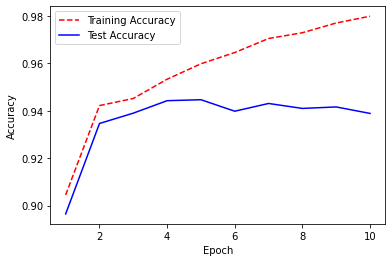

In [ ]:
from matplotlib import pyplot as plt
training_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize loss history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

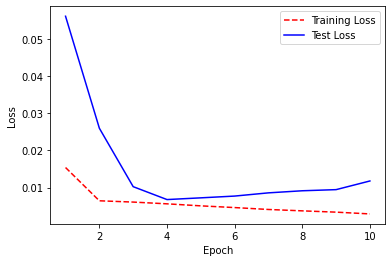

In [ ]:
from matplotlib import pyplot as plt
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();